# Problem 1
<p>
    In this problem we will use synthetic data sets to explore the bias-variance tradeoff
    incurred by using regularization.
</p>
<ul>
  <li> 
      <p>
           Generate data of the form:
           $ y = X\beta+ \epsilon $
      </p>
      <p>
          where X is an n x p matrix where n = 51, p = 50, and each $ X_{ij}  N(0, 1) $ Also, generate
          the noise according to i  N(0; 1=4). Let  be the all ones vector (for simplicity).
          By repeatedly doing this experiment and generating fresh data (fresh X, and y, and hence  {
          but make that you're not reseting your random seed!) but keeping  xed, you will estimate
          many different solutions, ^ . Estimate the mean and variance of ^ . Note that ^  is a vector,
          so for this exercise simply estimate the variance of a single component.
     </p>
  </li>
  <li>
  Use ridge regression, i.e., `2 regularization. Vary the regularization coeffcient $\lambda $ = 0:01; 0:1; 1; 10; 100 and repeat the above experiment. What do you observe? As you increase $\lambda $ is the model becoming more simple or more complex? As you increase $\lambda $ is performance becoming better or worse? Also compute LOOCV for each $\lambda $. How does the value of LOOCV, and in particular how it changes as $\lambda $ varies, compare with what you observe for the explicitly computed variance?
  </li>
  <li>
      Read about the Bootstrap, and try to use it to compute the variance (as above), but with a
    single copy of the data, rather than with many fresh copies of the data.
    </li>
</ul>

In [52]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import scatter_matrix
from IPython.core.interactiveshell import InteractiveShell
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

InteractiveShell.ast_node_interactivity = "all"
#%matplotlib notebook

## Part 1 Sampling

In [61]:
def createData():
    X = np.random.randn(51,50)
    beta = np.ones((50,1))
    epsilon = np.random.normal(loc=0, scale=0.25, size=(51,1))
    y = np.matmul(X, beta) + epsilon
    psuedo_inv = np.linalg.inv(np.matmul(X.T, X))
    beta_hat = np.matmul(np.matmul(psuedo_inv, X.T), epsilon) + beta
    return X, y, beta_hat, beta

In [24]:
def sampleData(n = 100):
    samples = []
    for i in range(n):
        X, y, beta_hat, beta = createData()
        samples.append(beta_hat[0,0])
    samples = np.array(samples)
    return samples

Mean of the sampling distribution $\beta$ is: 0.9817339555937701
Variance of the sampling distribution is: 0.4144753490820376


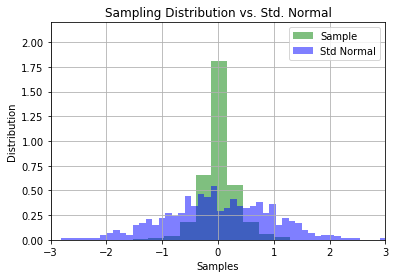

In [59]:
num_samples = 500
samples = sampleData(num_samples)
print("Mean of the sampling distribution is: {}".format(np.mean(samples)))
print("Variance of the sampling distribution is: {}".format(np.var(samples)))
num_bins = 50
_ = plt.hist(samples - np.mean(samples), num_bins, normed=1, facecolor='green', alpha = 0.5, label='Sample')
_ = plt.hist(np.random.randn(num_samples), num_bins, normed=1, facecolor='blue', alpha=0.5, label='Std Normal')
_ = plt.xlabel('Samples')
_ = plt.ylabel('Distribution')
_ = plt.title('Sampling Distribution vs. Std. Normal')
_ = plt.xlim([-3, 3])
_ = plt.ylim([0, 2.2])
_ = plt.legend()
_ = plt.grid(True)

Remark- note that sampling distribution was zero-meaned and normed.

## Part 2 Ridge Regression

In [62]:
alpha = 0.1
X, y, beta_hat, beta = createData()
model = Ridge(alpha=alpha)
_ = model.fit(X,y)


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)